<a href="https://colab.research.google.com/github/marziehamiri/MsWordDictionaryAddIn/blob/master/Homework_1_Student_Version_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2



## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
 74% 49.0M/66.0M [00:00<00:00, 128MB/s]
100% 66.0M/66.0M [00:00<00:00, 152MB/s]


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


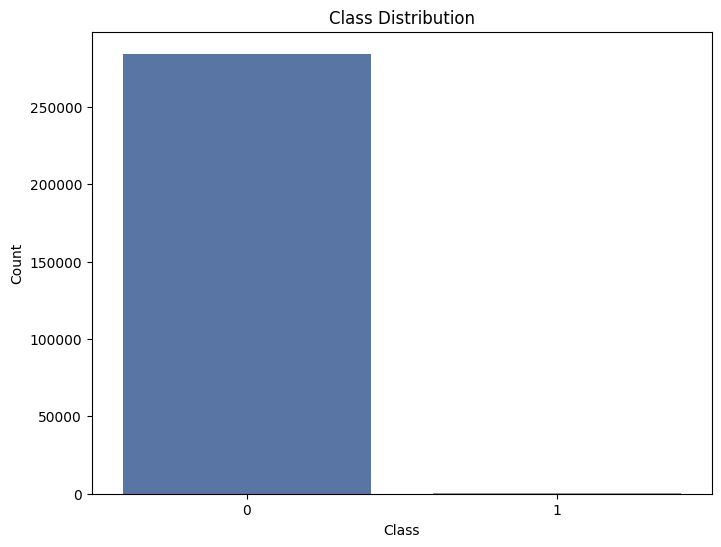

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution


class_cnt = y.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_cnt.index, y=class_cnt.values, palette='deep')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:

proportions = y.value_counts(normalize=True) * 100
proportions.name = 'proportion'
print("Class Distribution:")
print(proportions)

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


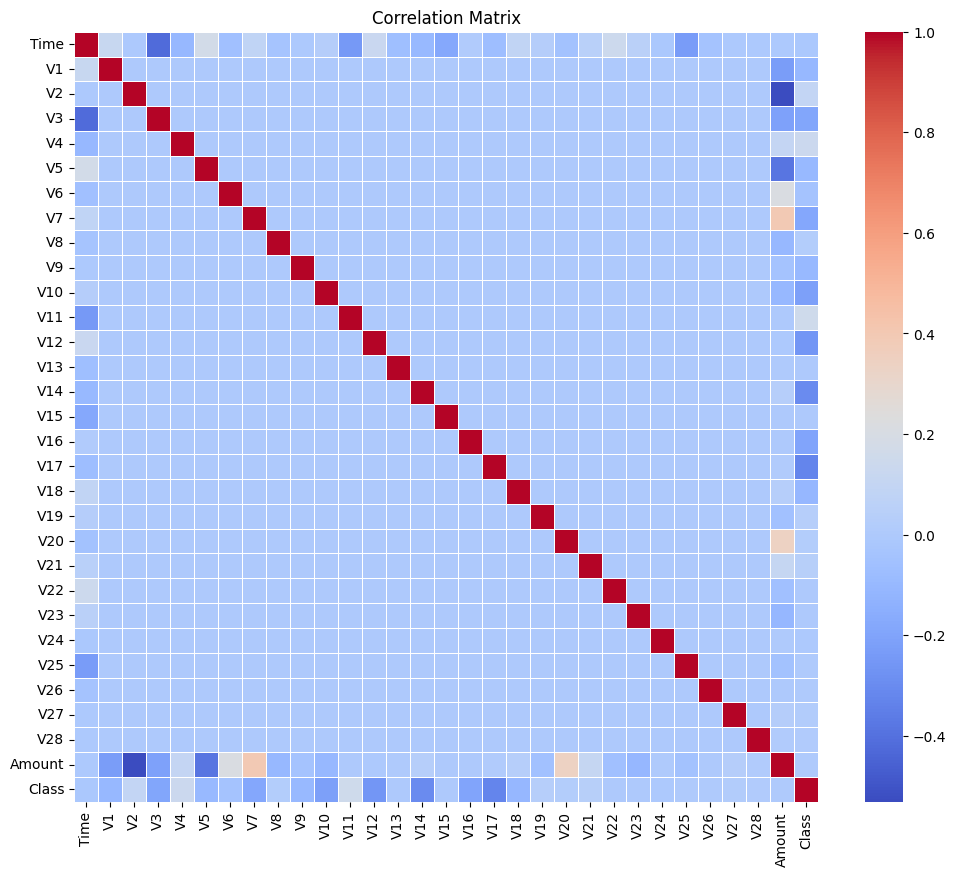

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix

corrMatrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix')
plt.show()

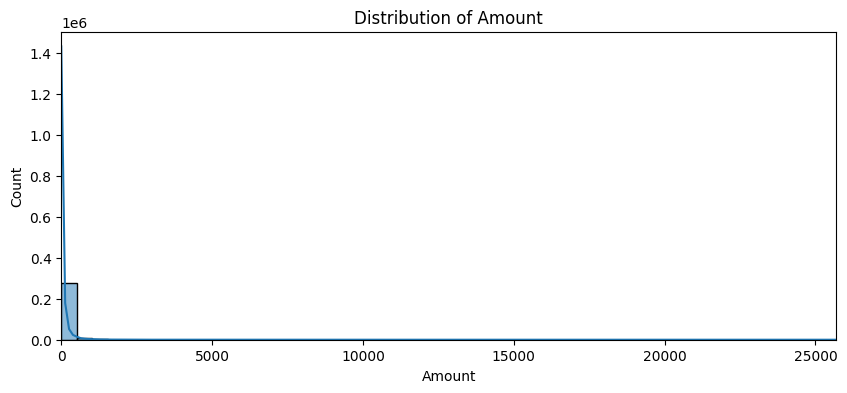

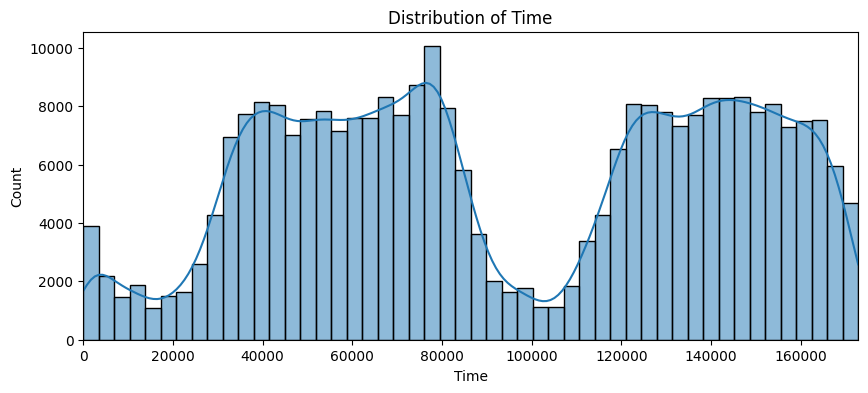

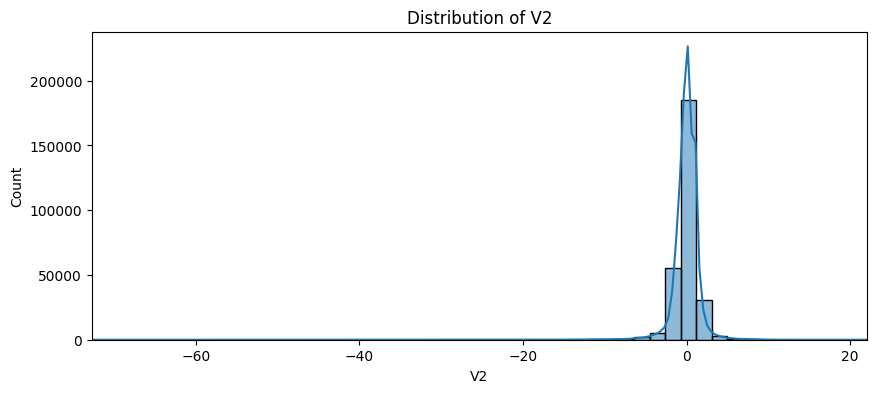

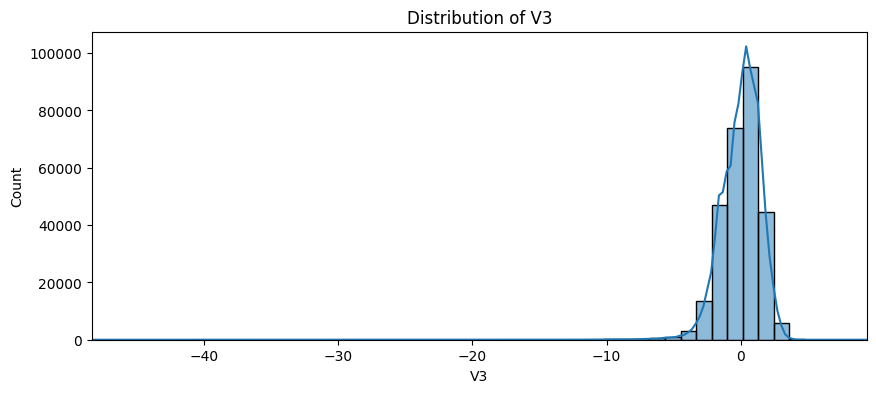

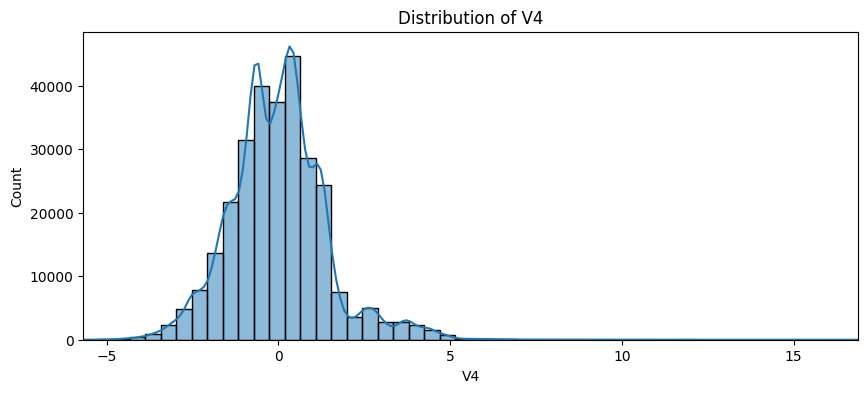

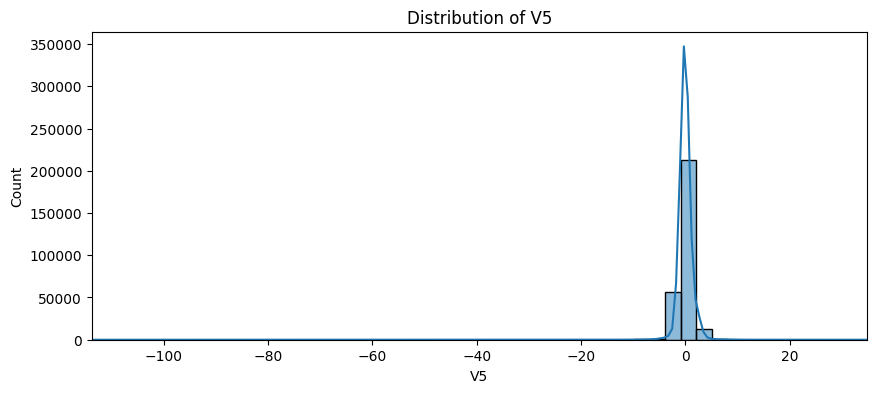

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
plt.figure(figsize=(10, 4))
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.xlim(df['Amount'].min(), df['Amount'].max())
plt.ylim(0, None)

plt.figure(figsize=(10, 4))
sns.histplot(df['Time'], kde=True, bins=50)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xlim(df['Time'].min(), df['Time'].max())
plt.ylim(0, None)

plt.figure(figsize=(10, 4))
sns.histplot(df['V2'], kde=True, bins=50)
plt.title('Distribution of V2')
plt.xlabel('V2')
plt.ylabel('Count')
plt.xlim(df['V2'].min(), df['V2'].max())
plt.ylim(0, None)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['V3'], kde=True, bins=50)
plt.title('Distribution of V3')
plt.xlabel('V3')
plt.ylabel('Count')
plt.xlim(df['V3'].min(), df['V3'].max())
plt.ylim(0, None)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['V4'], kde=True, bins=50)
plt.title('Distribution of V4')
plt.xlabel('V4')
plt.ylabel('Count')
plt.xlim(df['V4'].min(), df['V4'].max())
plt.ylim(0, None)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['V5'], kde=True, bins=50)
plt.title('Distribution of V5')
plt.xlabel('V5')
plt.ylabel('Count')
plt.xlim(df['V5'].min(), df['V5'].max())
plt.ylim(0, None)
plt.show()


In [ ]:
fraud =df[df.Class==1]
normal =df[df.Class==0]

print(f"Fraud : {fraud.shape}")
print(f"Normal : {normal.shape}")

Fraud : (492, 31)
Normal : (284315, 31)


Text(0.5, 1.0, 'Normal')

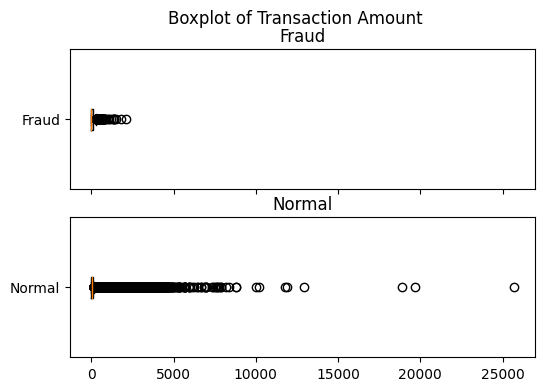

In [ ]:
# Boxplot of normal and fraudulent transactions

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
fig.suptitle('Boxplot of Transaction Amount')

ax1.boxplot(fraud.Amount, vert=False, labels=['Fraud'])
ax1.set_title('Fraud')

ax2.boxplot(normal.Amount, vert=False, labels=['Normal'])
ax2.set_title('Normal')

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.

  **Skewed Distribution**: The descriptive statistics (mean, median,
quartiles) for most variables (V1 to V21) suggest a non-normal distribution. The mean is often significantly different from the median, and the quartiles are not evenly spaced. This skewness can impact the applicability of certain statistical methods that assume normality.

  **Large Range of Values**: The difference between the minimum and maximum values for many variables is substantial. This indicates a wide range of observations, which can lead to outliers and heteroscedasticity. Outliers can distort statistical measures and make it difficult to identify meaningful patterns. Heteroscedasticity, where the variance of the data is not constant, can violate assumptions of certain statistical models.

2. Analyze the correlation matrix of the features.

  **Strong Diagonal**: The diagonal line of the matrix, representing the correlation of each variable with itself, naturally shows perfect correlation (values of 1).

  **Red Blocks**: Several red blocks are visible off the diagonal, indicating strong positive correlations between certain pairs of variables. This suggests that these variables tend to move together in the same direction. (amount , v7)(amount,v20)

  **Blue Blocks**: Some blue blocks are present, signifying negative correlations. This implies that these variables tend to move in opposite directions.(amount,v2)(amount,v5)

3. Is your data linearly separable? Please provide a rationale.
  Linear separability is highly unlikely in a fraud detection dataset.

  Rationale:
  **Complexity of Fraud Patterns**: Fraudulent activities often involve intricate patterns that are not easily captured by a linear decision boundary. Fraudsters constantly evolve their tactics, making it challenging to define a simple linear separation between fraudulent and legitimate transactions.
  **Multiple Features and Interactions**: Fraud detection datasets typically include numerous features such as transaction amount, location, time, user behavior, and more. These features often interact in complex ways, making linear relationships between fraud and non-fraud instances improbable.
  **Outliers and Noise**: Fraudulent transactions can be outliers in the feature space, making it difficult to find a linear hyperplane that effectively separates the two classes.
  

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [ ]:
# find the outliers from amount

fraud_outliers = fraud[fraud.Amount > 10000]
normal_outliers = normal[normal.Amount > 2500]

print(f"Fraudulent outliers: {fraud_outliers.shape}")
print(f"Normal outliers: {normal_outliers.shape}")

Fraudulent outliers: (0, 31)
Normal outliers: (440, 31)


In [ ]:

'''import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#normalization
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Standardization
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
'''


In [ ]:
#dropping the columns having correlation less than 0.13
for corr,column in zip(df.corr().iloc[30],df.columns):
    if abs(corr) <0.13:
        print(f"{column} has a correlation with Class: {corr}")

        df.drop(columns=column,inplace=True)

Time has a correlation with Class: -0.012322570929245588
V1 has a correlation with Class: -0.10134729859508294
V2 has a correlation with Class: 0.0912886503446179
V5 has a correlation with Class: -0.09497429899144802
V6 has a correlation with Class: -0.04364316069996494
V8 has a correlation with Class: 0.019875123914794384
V9 has a correlation with Class: -0.0977326860740807
V13 has a correlation with Class: -0.004569778799461309
V15 has a correlation with Class: -0.004223402267856675
V18 has a correlation with Class: -0.11148525388904133
V19 has a correlation with Class: 0.034783013036515056
V20 has a correlation with Class: 0.020090324196974638
V21 has a correlation with Class: 0.04041338061057565
V22 has a correlation with Class: 0.0008053175052983079
V23 has a correlation with Class: -0.0026851557402507824
V24 has a correlation with Class: -0.007220906715952582
V25 has a correlation with Class: 0.0033077055972996613
V26 has a correlation with Class: 0.0044553975012833254
V27 has a 

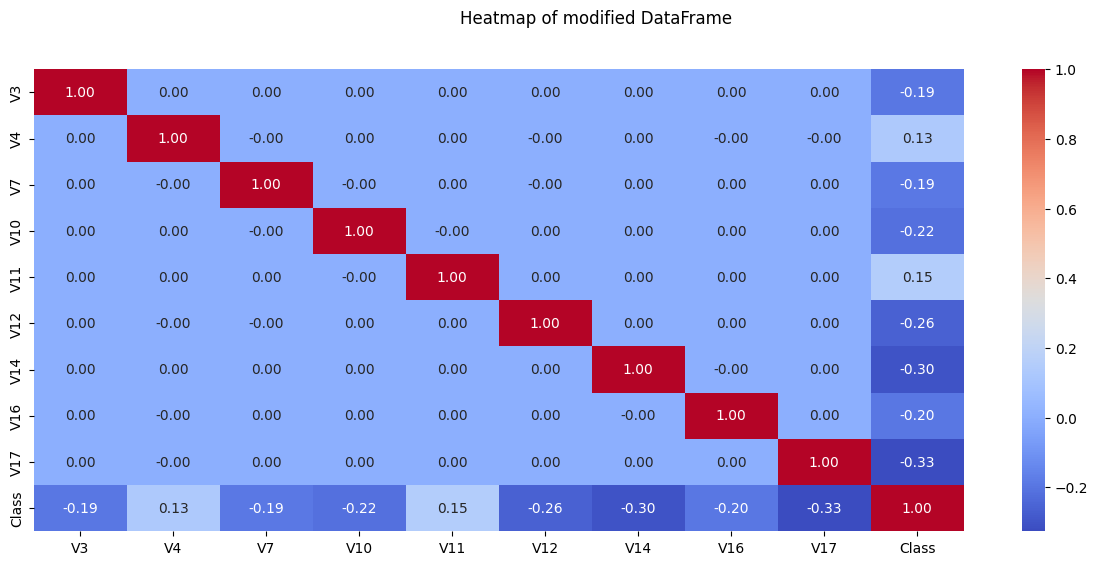

In [ ]:
# Heatmap of modified DataFrame
plt.figure(figsize=(15,6))
plt.suptitle('Heatmap of modified DataFrame')
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

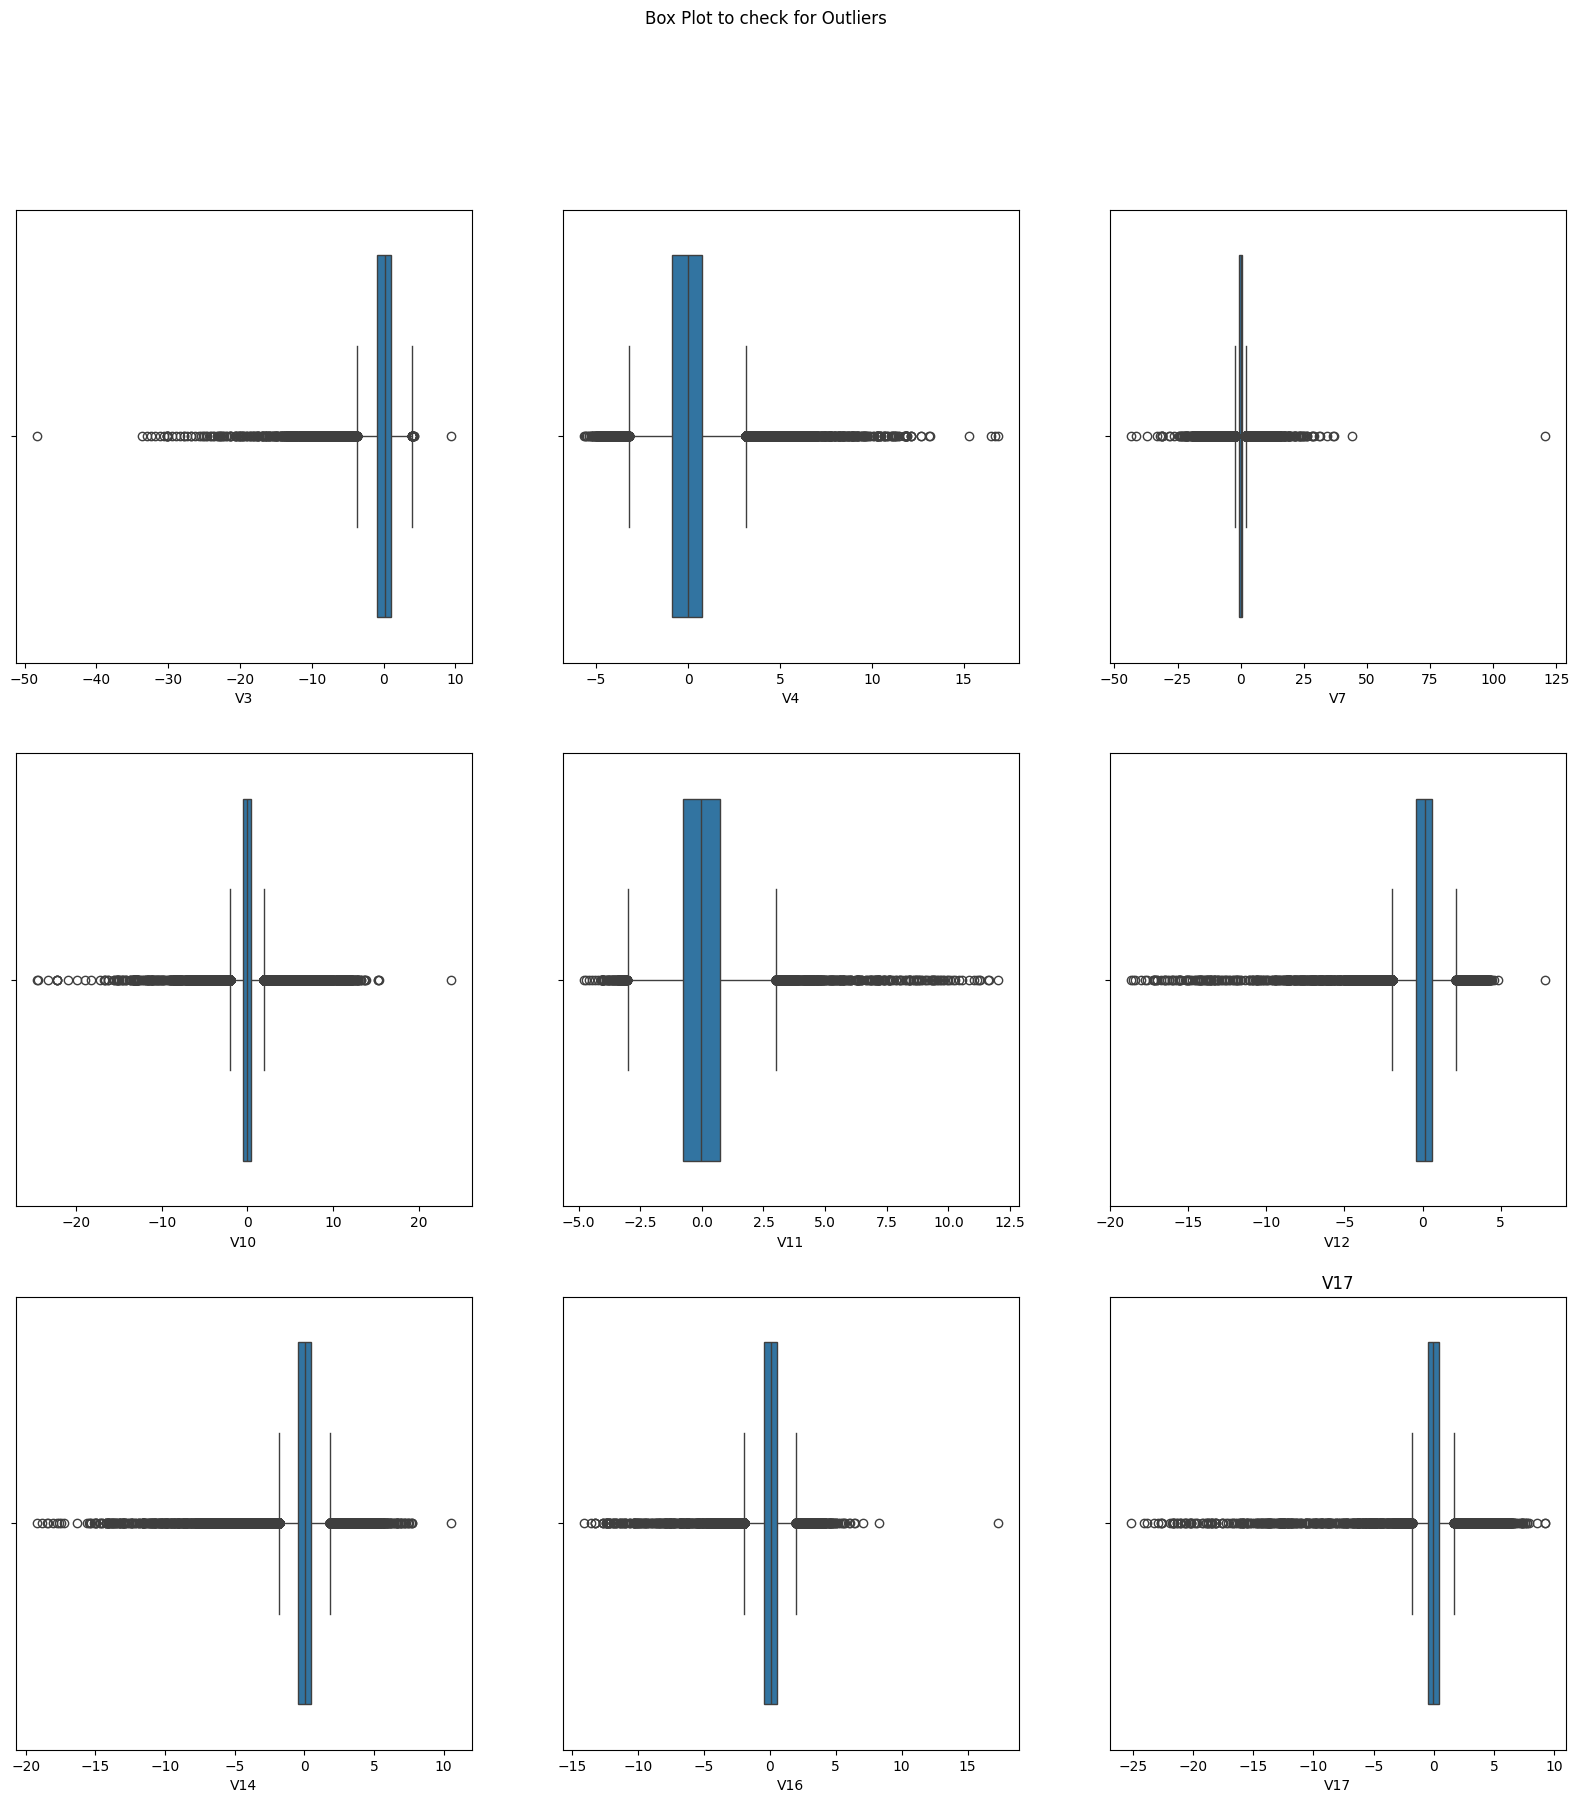

In [ ]:
'''
Blue box: Represents the IQR (Interquartile Range), containing the middle 50% of the data.
Line inside the box: Represents the median (middle value) of the data.
Whiskers: Extend from the box to the most extreme data points within a certain range (usually 1.5 times the IQR).
Dots: Represent outliers, which are data points that fall outside the whiskers.
'''
fig,ax = plt.subplots(3,3,figsize=(20,20))
ax = ax.flatten()
plt.suptitle('Box Plot to check for Outliers')
for i,column in enumerate(df.columns):
    if i ==9:
        continue
    sns.boxplot(data = df , x = column, ax = ax[i])
    plt.title(column)

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [ ]:

X1 = df.drop(columns = ['Class'])
y1 = df.Class

from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

In [ ]:


def result(model,X1_test,y1_test):

  from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
  y1_pred = model.predict(X1_test)
  print(classification_report(y1_test,y1_pred))
  cm = confusion_matrix(y1_test,y1_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm)
  fig,ax = plt.subplots(figsize=(6,6),gridspec_kw = None)
  disp.plot(cmap=plt.cm.Blues,ax=ax)
  plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.75      0.78       136

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



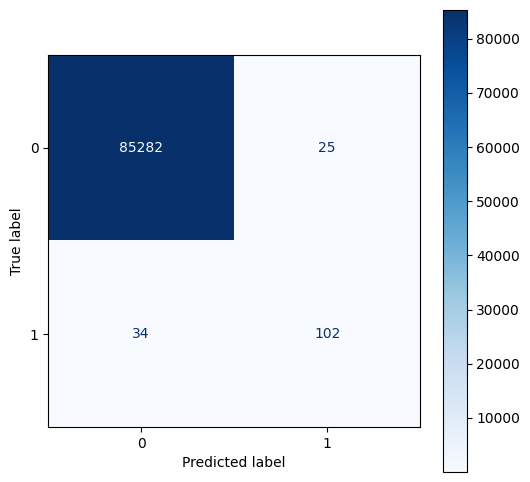

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
# Under-sample the data
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.005)
X1_train_resampled, y1_train_resampled = rus.fit_resample(X1_train, y1_train)

model = make_pipeline(
    # ... other transformers ...
    LogisticRegression(max_iter=300)
)

model.fit(X1_train_resampled, y1_train_resampled)
result(model, X1_test, y1_test)

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
from sklearn.svm import SVC

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # Import SMOTE

import warnings

warnings.filterwarnings("ignore")


In [ ]:
X1 = df.drop(columns = ['Class'])
y1 = df.Class

# Normalize features (consider other preprocessing if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

X1_train,X1_test,y1_train,y1_test = train_test_split(X_scaled,y1,test_size=0.3,random_state=42)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X1_train, y1_train)

In [ ]:
svc = SVC(random_state=101)
svc.fit(X_train_res,y_train_res)
#accuracies = cross_val_score(svc,X_train_res,y_train_res,cv=5)

SVC(random_state=101)

In [ ]:
y_pred = svc.predict(X1_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.92      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



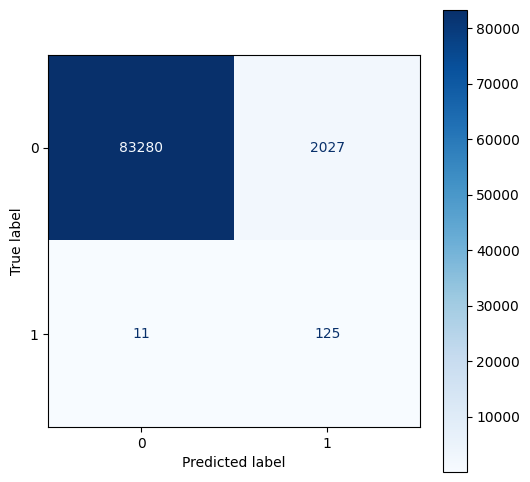

In [ ]:
print(classification_report(y1_test,y_pred))
cm = confusion_matrix(y1_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig,ax = plt.subplots(figsize=(6,6),gridspec_kw = None)
disp.plot(cmap=plt.cm.Blues,ax=ax)
plt.show()

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?

  **SVM**:
Excel at high-dimensional spaces and complex decision boundaries.
Often performs well with small datasets.
Can be computationally expensive for large datasets.
  **Logistic Regression**:
Provides probabilistic outputs.
Generally faster to train and easier to interpret.
Might struggle with complex decision boundaries.
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
  
  **Accuracy** is not always a suitable metric for evaluating performance, especially in imbalanced datasets. If one class significantly outnumbers the other, a model could achieve high accuracy by simply predicting the majority class.

  For example, in a fraud detection problem, where fraudulent transactions are rare, a model could achieve high accuracy by always predicting "not fraud." However, this would be a terrible model since it would fail to detect any fraudulent transactions.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  If high recall is crucial, it means you want to minimize false negatives (i.e., instances of the positive class incorrectly classified as negative). This is common in scenarios like fraud detection, medical diagnosis, or spam filtering.

  **Recommendations to Enhance Recall:**

  1.Class Weighting: Assign higher weights to the minority class during training to balance the dataset.
  2.Undersampling or Oversampling: Adjust the class distribution by removing instances from the majority class or duplicating instances from the minority class.
  3.Focus on the ROC curve: Instead of accuracy, analyze the ROC curve to find the optimal threshold for maximizing recall while controlling the false positive rate.
  4.Precision-Recall curve: This curve is more suitable for imbalanced datasets and can help you find the best trade-off between precision and recall.
  5.Cost-sensitive learning: Assign different costs to different types of errors (false positives and false negatives) to reflect the real-world impact of misclassifications.
  6.Ensemble methods: Combine multiple models (e.g., random forest, gradient boosting) to improve overall performance.



# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

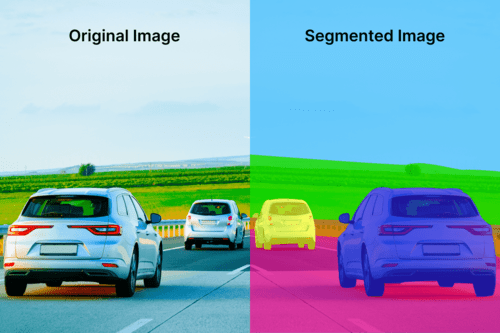

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 52.9MB/s]


In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


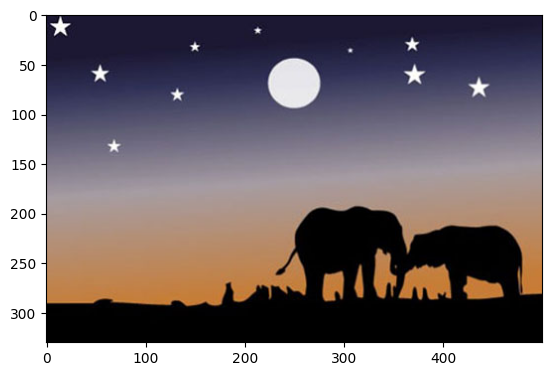

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








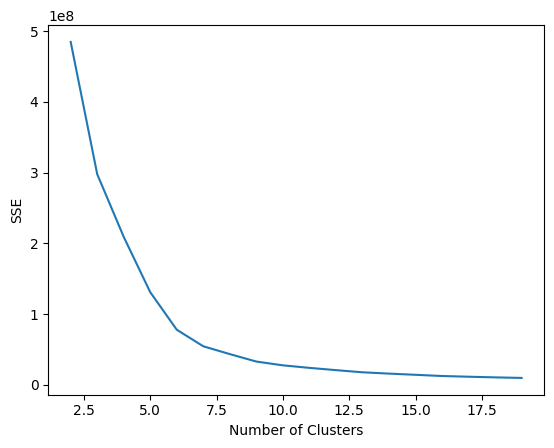

In [ ]:
# Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Elbow Method
sse = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(all_pixels)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 20), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()




## Visualize Dominant Color

[[159.78743426 144.09436098 144.99950473]
 [ 37.13767514  34.33264108  63.43894335]
 [ 93.10838491  90.20947539 114.88623637]
 [  1.48395319   0.8304368    1.15232881]
 [232.77852349 232.47427293 236.75242356]
 [188.89735713 132.54732324  83.68389429]]
[[159 144 144]
 [ 37  34  63]
 [ 93  90 114]
 [  1   0   1]
 [232 232 236]
 [188 132  83]]


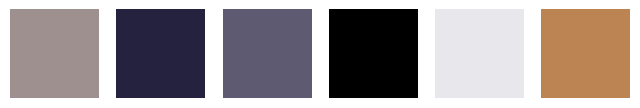

In [ ]:

from sklearn.cluster import KMeans

dominant_colors = 6

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

centers = km.cluster_centers_
print(centers) # In RGB Format
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

print(centers)

i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


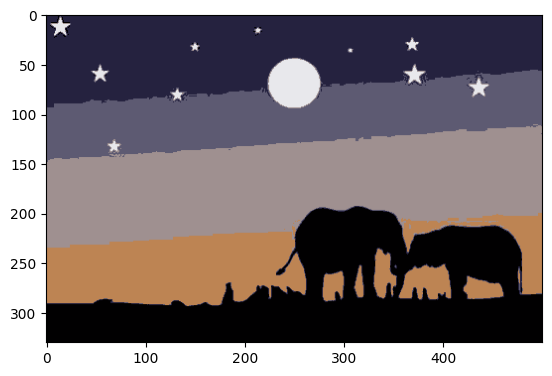

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()